In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

C:\Users\woosung\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
cleanmeta = pd.read_csv("actormetaMonths.csv")
cleanmeta = cleanmeta[['budget','revenue','popularity','runtime','castRevBudRatio','january','february','march','april','may','june','july','august','september','october','november','december']]
cleanmeta = cleanmeta.dropna()
cleanmeta = cleanmeta.reset_index()
X = cleanmeta[['budget','popularity','runtime','castRevBudRatio','january','february','march','april','may','june','july','august','september','october','november','december']].values
y = cleanmeta['revenue']/cleanmeta['budget'].values

In [70]:
#np.median(y)

In [3]:
#2 is near median of y
for i in range(0,len(y)):
    if y[i] > 2:
        y[i] = 0 #success
    else:
        y[i] = 1 #failure


In [35]:
X_train = X[:4500]
X_test = X[4500:]

y_train = y[:4500]
y_test = y[4500:]



In [46]:
len(y_test)

881

In [44]:
y_pred_saga

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [50]:
"""
Penalty param
"""
lr = LogisticRegression(random_state=0, solver='liblinear', penalty= 'l2')
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
scores = cross_val_score(lr, X_test, y_test, cv=10).mean()
p= cross_val_score(lr, X_test, y_test, cv=10, scoring='precision').mean()
r= cross_val_score(lr, X_test, y_test, cv=10, scoring='recall').mean()
f1= cross_val_score(lr, X_test, y_test, cv=10, scoring='f1').mean()

#r =recall_score(y_test, y_pred)  
#p =precision_score(y_test, y_pred)  
#f1 =f1_score(y_test, y_pred)  

C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\metrics\classification.

In [51]:
lr_l1 = LogisticRegression(random_state=0, solver='liblinear', penalty= 'l1')
lr_l1.fit(X_train,y_train)
y_pred_l1 = lr_l1.predict(X_test)
scores_l1 = cross_val_score(lr_l1, X_test, y_test, cv=10).mean()
p_l1= cross_val_score(lr_l1, X_test, y_test, cv=10, scoring='precision').mean()
r_l1= cross_val_score(lr_l1, X_test, y_test, cv=10, scoring='recall').mean()
f1_l1= cross_val_score(lr_l1, X_test, y_test, cv=10, scoring='f1').mean()

#rl1 = recall_score(y_test, y_pred_l1)  
#pl1 = precision_score(y_test, y_pred_l1)  
#f1l1 = f1_score(y_test, y_pred_l1) 

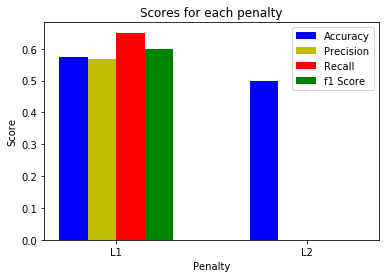

In [52]:
N = 2

ind = np.arange(N)
width = 0.15
fig, ax = plt.subplots()

accu = [scores_l1,scores]
rects1 = ax.bar(ind, accu, width, color='b')
prec = [p_l1,p]
rects2 = ax.bar(ind+width, prec, width, color='y')
rec = [r_l1,r]
rects3 = ax.bar(ind + 2 * width, rec, width, color='r')
f1score = [f1_l1,f1]
rects4 = ax.bar(ind+ 3 * width, f1score,  width, color='g')

ax.set_ylabel('Score')
ax.set_xlabel("Penalty")
ax.set_title('Scores for each penalty')
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(('L1', 'L2'))
ax.legend((rects1[0], rects2[0], rects3[0],rects4[0]), ('Accuracy', 'Precision', 'Recall','f1 Score'))

plt.show()

L1 is better than L2 with our data

In [31]:
"""
Solvers
"""
# lr = LogisticRegression(random_state=0,solver='liblinear') #default
# lr.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# scores = cross_val_score(lrl1, X_test, y_test, cv=10).mean()
# r = recall_score(y_test, y_pred_l1)  
# p = precision_score(y_test, y_pred_l1)  
# f1 = f1_score(y_test, y_pred_l1) 

'\nSolvers\n'

In [56]:
lr_ll = LogisticRegression(random_state=0,solver='liblinear', penalty= 'l1')
lr_ll.fit(X_train,y_train)
y_pred_ll = lr_ll.predict(X_test)
scores_ll = cross_val_score(lr_ll, X_test, y_test, cv=10).mean()
p_ll= cross_val_score(lr_ll, X_test, y_test, cv=10, scoring='precision').mean()
r_ll= cross_val_score(lr_ll, X_test, y_test, cv=10, scoring='recall').mean()
f1_ll= cross_val_score(lr_ll, X_test, y_test, cv=10, scoring='f1').mean()

In [54]:
lr_saga = LogisticRegression(random_state=0,solver='saga', max_iter = 10000,penalty ='l1')
lr_saga.fit(X_train,y_train)
y_pred_saga = lr_saga.predict(X_test)
scores_saga = cross_val_score(lr_saga, X_test, y_test, cv=10).mean()
p_saga= cross_val_score(lr_saga, X_test, y_test, cv=10, scoring='precision').mean()
r_saga= cross_val_score(lr_saga, X_test, y_test, cv=10, scoring='recall').mean()
f1_saga= cross_val_score(lr_saga, X_test, y_test, cv=10, scoring='f1').mean()

C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\metrics\classification.

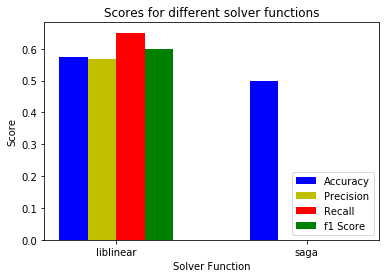

In [57]:
N = 2

ind = np.arange(N)
width = 0.15
fig, ax = plt.subplots()

accu = [scores_ll,scores_saga]
rects1 = ax.bar(ind, accu, width, color='b')
prec = [p_ll,p_saga]
rects2 = ax.bar(ind+width, prec, width, color='y')
rec = [r_ll,r_saga]
rects3 = ax.bar(ind + 2 * width, rec, width, color='r')
f1score = [f1_ll,f1_saga]
rects4 = ax.bar(ind+ 3 * width, f1score,  width, color='g')


ax.set_ylabel('Score')
ax.set_xlabel('Solver Function')
ax.set_title('Scores for different solver functions')
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(('liblinear','saga'))
ax.legend((rects1[0], rects2[0], rects3[0],rects4[0]), ('Accuracy', 'Precision', 'Recall','f1 Score'),loc=4)

plt.show()

Only liblinear and saga solver works with L1 penalty.
liblinear is the best performing one 0.5731387881136041

In [84]:
#multi_class : str, {‘ovr’, ‘multinomial’, ‘auto’}, default: ‘ovr’ 
"""
only ovr works for multi_class.  Solver liblinear does not support a multinomial backend.
"""

no difference between 2, will go with multinomial because "auto" multi class multinomial first.

In [88]:
"""
Tolerance 
"""

'\nTolerance \n'

In [37]:
lr = LogisticRegression(random_state=0,solver ='liblinear',penalty= 'l1') #default 1e-4
lr.fit(X_train,y_train) 
y_pred = lr.predict(X_test)
scores = cross_val_score(lr, X_test, y_test, cv=10).mean()
r =recall_score(y_test, y_pred)  
p =precision_score(y_test, y_pred)  
f1 =f1_score(y_test, y_pred)  

ValueError: Solver lbfgs supports only l2 penalties, got l1 penalty.

In [90]:
lr_t3 = LogisticRegression(random_state=0,solver ='lbfgs', multi_class = 'multinomial', tol= 1e-3) #default 1e-4
lr_t3.fit(X_train,y_train) 
y_pred_t3 = lr_t3.predict(X_test)
scores_t3 = cross_val_score(lr_t3, X_test, y_test, cv=10).mean()
r_t3 =recall_score(y_test, y_pred_t3)  
p_t3 =precision_score(y_test, y_pred_t3)  
f1_t3 =f1_score(y_test, y_pred_t3)  

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [91]:
lr_t5 = LogisticRegression(random_state=0,solver ='lbfgs', multi_class = 'multinomial', tol= 1e-5) #default 1e-4
lr_t5.fit(X_train,y_train) 
y_pred_t5 = lr_t5.predict(X_test)
scores_t5 = cross_val_score(lr_t5, X_test, y_test, cv=10).mean()
r_t5 =recall_score(y_test, y_pred_t5)  
p_t5 =precision_score(y_test, y_pred_t5)  
f1_t5 =f1_score(y_test, y_pred_t5)  

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


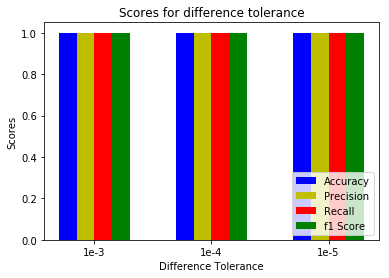

In [92]:
N =3

ind = np.arange(N)
width = 0.15
fig, ax = plt.subplots()

accu = [scores_t3,scores,scores_t5]
rects1 = ax.bar(ind, accu, width, color='b')
prec = [p_t3,p,p_t5]
rects2 = ax.bar(ind+width, prec, width, color='y')
rec = [r_t3,r,r_t5]
rects3 = ax.bar(ind + 2 * width, rec, width, color='r')
f1score = [f1_t3,f1,f1_t5]
rects4 = ax.bar(ind+ 3 * width, f1score,  width, color='g')

ax.set_ylabel('Scores')
ax.set_xlabel('Difference Tolerance')
ax.set_title('Scores for difference tolerance')
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(('1e-3','1e-4','1e-5'))
ax.legend((rects1[0], rects2[0], rects3[0],rects4[0]), ('Accuracy', 'Precision', 'Recall','f1 Score'),loc=4)

plt.show()

no difference, we will go with 1e-4 which is a default

In [93]:
"""
C
"""
lr = LogisticRegression(random_state=0,solver ='lbfgs', multi_class = 'multinomial') #default 1
lr.fit(X_train,y_train) 
y_pred = lr.predict(X_test)
scores = cross_val_score(lr, X_test, y_test, cv=10).mean()
r =recall_score(y_test, y_pred)  
p =precision_score(y_test, y_pred)  
f1 =f1_score(y_test, y_pred)  


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [94]:
lr_c8 = LogisticRegression(random_state=0,solver ='lbfgs', multi_class = 'multinomial', C = 0.8) #default 1
lr_c8.fit(X_train,y_train) 
y_pred_c8 = lr_c8.predict(X_test)
scores_c8 = cross_val_score(lr_c8, X_test, y_test, cv=10).mean()
r_c8 =recall_score(y_test, y_pred_c8)  
p_c8 =precision_score(y_test, y_pred_c8)  
f1_c8 =f1_score(y_test, y_pred_c8)  


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

In [95]:
lr_c6 = LogisticRegression(random_state=0,solver ='lbfgs', multi_class = 'multinomial',C = 0.6) #default 1
lr_c6.fit(X_train,y_train) 
y_pred_c6 = lr_c6.predict(X_test)
scores_c6 = cross_val_score(lr_c6, X_test, y_test, cv=10).mean()
r_c6 =recall_score(y_test, y_pred_c6)  
p_c6 =precision_score(y_test, y_pred_c6)  
f1_c6 =f1_score(y_test, y_pred_c6)  


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [96]:
lr_c4 = LogisticRegression(random_state=0,solver ='lbfgs', multi_class = 'multinomial', C= 0.4) #default 1
lr_c4.fit(X_train,y_train) 
y_pred_c4 = lr_c4.predict(X_test)
scores_c4 = cross_val_score(lr_c4, X_test, y_test, cv=10).mean()
r_c4 =recall_score(y_test, y_pred_c4)  
p_c4 =precision_score(y_test, y_pred_c4)  
f1_c4 =f1_score(y_test, y_pred_c4)  


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

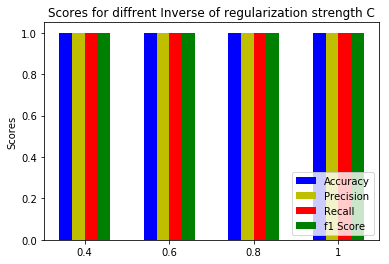

In [97]:
N =4

ind = np.arange(N)
width = 0.15
fig, ax = plt.subplots()

accu = [scores_c4,scores_c6,scores_c8,scores]
rects1 = ax.bar(ind, accu, width, color='b')
prec = [p_c4,p_c6,p_c8,p]
rects2 = ax.bar(ind+width, prec, width, color='y')
rec = [r_c4,r_c6,r_c8,r]
rects3 = ax.bar(ind + 2 * width, rec, width, color='r')
f1score = [f1_c4,f1_c6,f1_c8,f1]
rects4 = ax.bar(ind+ 3 * width, f1score,  width, color='g')

ax.set_ylabel('Scores')
ax.set_title('Scores for diffrent Inverse of regularization strength C')
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(('0.4','0.6','0.8','1'))
ax.legend((rects1[0], rects2[0], rects3[0],rects4[0]), ('Accuracy', 'Precision', 'Recall','f1 Score'),loc=4)

plt.show()

C = 0.8 has the highest accuracy


In [65]:
"""
Final Model
"""
lr = LogisticRegression(random_state=0,solver ='lbfgs', multi_class = 'multinomial', C = 0.8) #default 1
lr.fit(X_train,y_train) 
y_pred = lr.predict(X_test)
scores = cross_val_score(lr, X_test, y_test, cv=10).mean()
r =recall_score(y_test, y_pred)  
p =precision_score(y_test, y_pred)  
f1 =f1_score(y_test, y_pred)  


C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


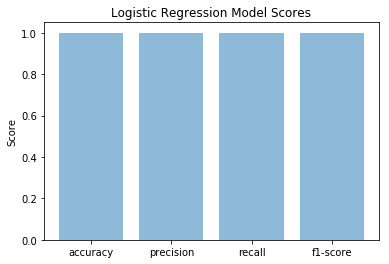

In [66]:
objects = scores,p,r,f1
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, objects, align='center', alpha=0.5)
plt.xticks([0, 1, 2, 3], ["accuracy", "precision", "recall", "f1-score"])
plt.ylabel('Score')
plt.title('Logistic Regression Model Scores')
 
plt.show()

In [67]:
objects  #["accuracy", "precision", "recall", "f1-score"])

(0.99771421107628, 0.9977477477477478, 1.0, 0.9988726042841037)

Feature ranking:
1. feature 0 (0.623540)
2. feature 1 (0.311760)
3. feature 4 (0.197112)
4. feature 7 (0.087836)
5. feature 12 (0.067013)
6. feature 2 (0.057409)
7. feature 3 (0.008838)
8. feature 13 (0.005591)
9. feature 5 (0.002666)
10. feature 9 (0.000872)
11. feature 8 (0.000245)
12. feature 16 (0.000042)
13. feature 14 (0.000008)
14. feature 6 (0.000001)
15. feature 15 (0.000001)
16. feature 11 (0.000001)
17. feature 10 (0.000000)


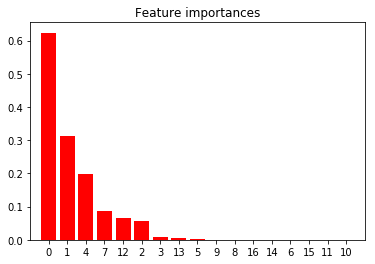

In [68]:
weights = lr.coef_[0]
importances = np.abs(weights)

indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

'budget','revenue','popularity','runtime','castRevBudRatio','january','february','march','april','may','june','july','august','september','october','november','december'

In [102]:
print(weights)
print(sorted(weights)[::-1])
print(np.argsort(weights)[::-1])


[-2.13108730e-04  5.24909460e-01 -2.62402435e-01 -9.38312136e-04
  1.49210069e-02 -2.46351085e-01  5.05690177e-03 -4.13164220e-03
 -4.82854584e-02  1.72157895e-03 -2.51715715e-04 -5.72808190e-09
  1.86734762e-04  3.49591135e-02  1.62389177e-02  2.01731427e-03
  1.37492777e-07 -1.36341008e-02]
[0.5249094598710888, 0.034959113454246, 0.01623891766432163, 0.014921006910146195, 0.005056901772557669, 0.0020173142722658558, 0.0017215789451528016, 0.00018673476184163004, 1.3749277663353142e-07, -5.7280819040769935e-09, -0.00021310872987592667, -0.000251715715317659, -0.0009383121362767993, -0.004131642203228658, -0.013634100763170719, -0.04828545843826954, -0.2463510853672508, -0.26240243518839695]
[ 1 13 14  4  6 15  9 12 16 11  0 10  3  7 17  8  5  2]


positive correlation: 1  Positive correlation below 0.0 coef: 13  3  4 14  6 15  9 12 16 11

Neg correlation: 2  Neg correlation below 0.0 coef:  0 10  7  8 17  5 